In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.autograd import grad

In [2]:
torch.tensor([[1,2,3],[4,5,6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

Bài 1: Cho phương trình f(x)= $x^2$, hãy sử dụng thuật toán gradient descent để tối ưu. Sau đó vẽ đồ thị hàm f(x) sau 10 lần cập nhật bước 2 với:

In [3]:
def gradient_descent(n_epochs, f, learning_rate, x0):
  iter = 0
  x = torch.tensor([float(x0)], requires_grad=True)
  x_hist = []
  f_hist = []
  while iter < n_epochs:
    grad_f = grad(f(x), x)[0]
    x0 = x
    x = x - grad_f * learning_rate
    x_hist.append(x.item())
    f_hist.append(f(x.item()))
    iter += 1
  return (x_hist, f_hist)

Text(0.5, 1.0, 'f(x) after 10 iterations with learning rate 0.2')

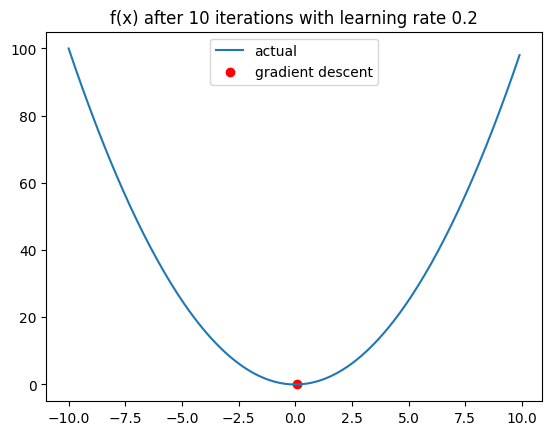

In [17]:
def f(x):
  return x**2

learning_rate = 0.2
result = gradient_descent(n_epochs = 10, f = f, learning_rate = learning_rate, x0 = 10)


fig, ax = plt.subplots()
X = np.arange(-10, 10, 0.1)
y = [f(x) for x in X]
ax.plot(X, y, label = "actual")
ax.scatter(result[0][-1], result[1][-1], c = "red", label = "gradient descent")
ax.legend()
ax.set_title(f"f(x) after 10 iterations with learning rate {learning_rate}")


Text(0.5, 1.0, 'f(x) after 10 iterations with learning rate 2')

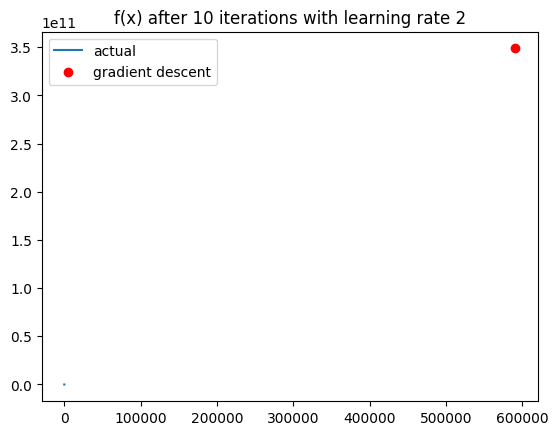

In [18]:
learning_rate = 2
result = gradient_descent(n_epochs = 10, f = f, learning_rate = learning_rate, x0 = 10)


fig, ax = plt.subplots()
X = np.arange(-100, 10, 0.1)
y = [f(x) for x in X]
ax.plot(X, y, label = "actual")
ax.scatter(result[0][-1], result[1][-1], c = "red", label = "gradient descent")
ax.legend()
ax.set_title(f"f(x) after 10 iterations with learning rate {learning_rate}")

Bài 2:
Cho dataset dự đoán giá nhà dựa vào diện tích (https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv) Dựa vào code mẫu hãy:
* Implement thuật toán linear regression với dữ liệu trên


In [6]:
class LinearRegression():
  def __init__(self, X, y):
    self.X = X
    self.y = y


  def model(self, a, b):
    return a * self.X + b

  def loss_fnc(self, y_hat, y):
    return ((y_hat - y)**2).mean()

  def train(self, n_epochs, learning_rate, init_params):
    self.loss_history = []
    self.lr = learning_rate

    a = torch.tensor([init_params[0]], requires_grad=True)
    b = torch.tensor([init_params[1]], requires_grad=True)
    iter = 0
    while iter < n_epochs:
      if a.grad is not None:
        a.grad.zero_()
      if b.grad is not None:
        b.grad.zero_()
      y_hat = self.model(a, b)
      loss = self.loss_fnc(self.y, y_hat)
      self.loss_history.append(loss.item())
      loss.backward()

      with torch.no_grad():
        a -=  a.grad * learning_rate
        b -=  b.grad * learning_rate

      iter += 1
    self.a = a.item()
    self.b = b.item()
    return (self.a, self.b)

  def predict(self, X):
    return self.a * X + self.b

  def plot_model(self):
    x_plot = [min(self.X), max(self.X)]
    y_plot = [min(self.X) * self.a + self.b, max(self.X) * self.a + self.b]
    print(y_plot)
    fig, ax = plt.subplots()
    ax.scatter(self.X, self.y)
    ax.set_title(f"Linear regression with learning rate {self.lr} and {len(self.loss_history)} iterations")
    ax.plot(x_plot, y_plot)



* Chỉnh learning rate cho dữ liệu trên, chọn 1 learning rate lớn bị overshoot, 1 learning vừa, và 1 learning rate nhỏ. Với mỗi learning rate, vẽ đồ thị loss tương ứng

In [7]:

data = pd.read_csv('/content/data_linear (1).csv').values
x = torch.tensor(data[:,0])
y = torch.tensor(data[:,1])



[tensor(445.6407, dtype=torch.float64), tensor(1482.6876, dtype=torch.float64)]


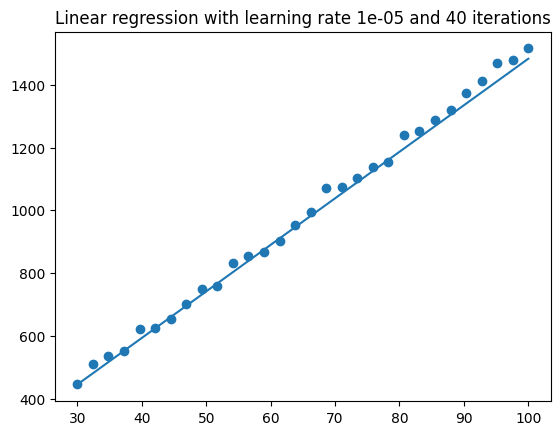

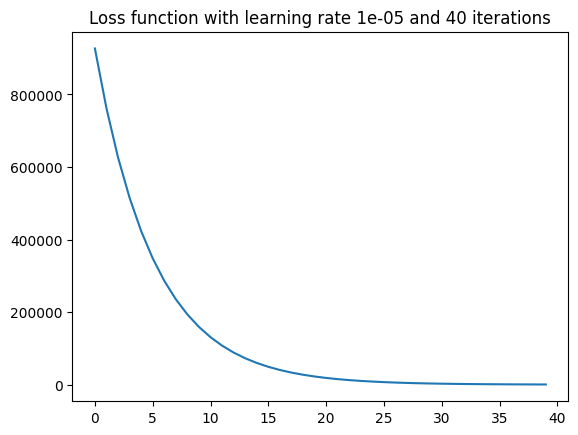

In [8]:
lr = LinearRegression(x, y)

iterations = 40
learning_rate = 0.00001

lr.train(n_epochs = iterations, learning_rate= learning_rate, init_params = (1., 1.))

lr.plot_model()

fig, ax = plt.subplots()
ax.set_title(f"Loss function with learning rate {learning_rate} and {iterations} iterations")
ax.plot(range(len(lr.loss_history)), lr.loss_history)

[tensor(-1.5033e+25, dtype=torch.float64), tensor(-5.0094e+25, dtype=torch.float64)]


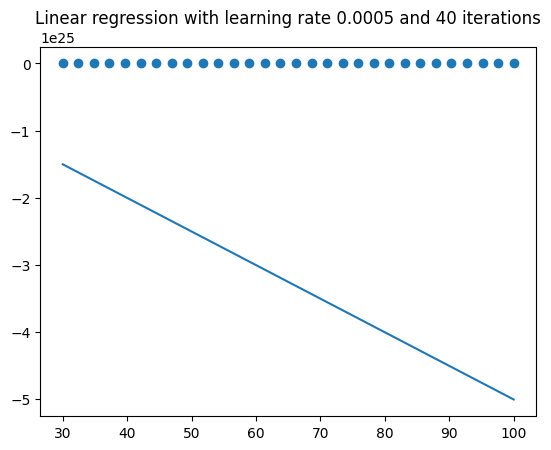

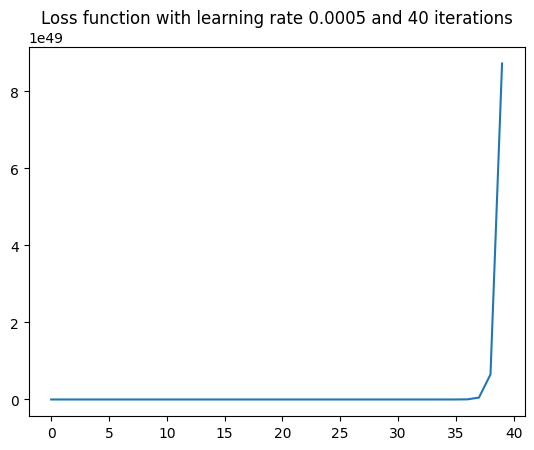

In [9]:
lr = LinearRegression(x, y)

iterations = 40
learning_rate = 0.0005 # overshot learning rate

lr.train(n_epochs = iterations, learning_rate= learning_rate, init_params = (1., 1.))

lr.plot_model()

fig, ax = plt.subplots()
ax.set_title(f"Loss function with learning rate {learning_rate} and {iterations} iterations")
ax.plot(range(len(lr.loss_history)), lr.loss_history)

[tensor(163.2246, dtype=torch.float64), tensor(541.6054, dtype=torch.float64)]


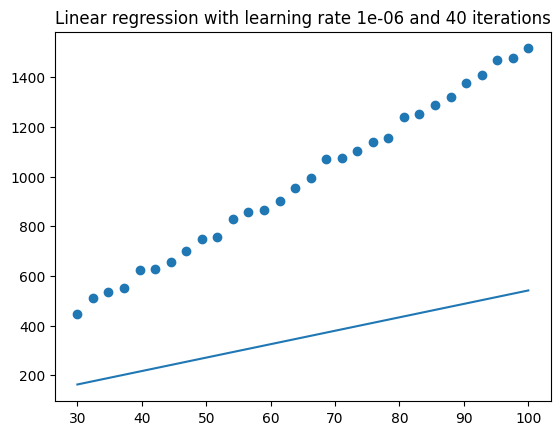

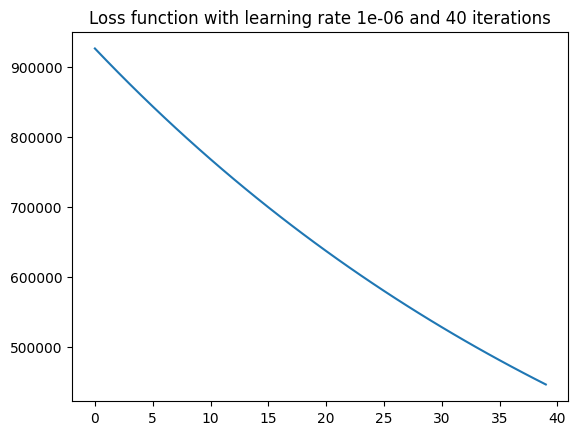

In [10]:
lr = LinearRegression(x, y)

iterations = 40
learning_rate = 0.000001 # too small learning rate

lr.train(n_epochs = iterations, learning_rate= learning_rate, init_params = (1., 1.))

lr.plot_model()

fig, ax = plt.subplots()
ax.set_title(f"Loss function with learning rate {learning_rate} and {iterations} iterations")
ax.plot(range(len(lr.loss_history)), lr.loss_history)

* Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data[: ,0], data[: ,1], test_size = 0.2, random_state = 10)

In [13]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

iterations = 40
learning_rate = 0.00001

lr = LinearRegression(X_train, y_train)
lr.train(n_epochs = iterations, learning_rate= learning_rate, init_params = (1., 1.))

(14.905655860900879, 1.1874192953109741)

[tensor(448.3571, dtype=torch.float64), tensor(1491.7530, dtype=torch.float64)]


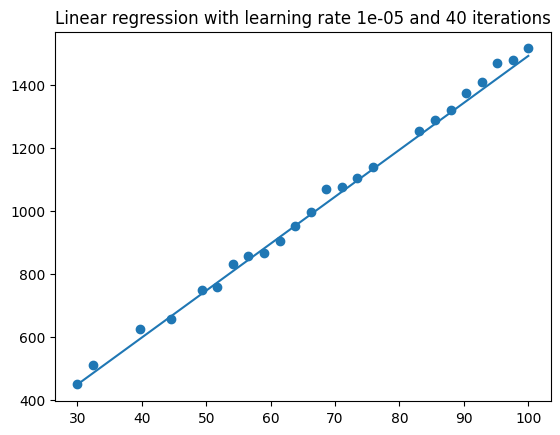

In [14]:
lr.plot_model()

In [15]:
y_pred = lr.predict(X_test)

def evaluate_model(y_true, y_predict):
  df = pd.DataFrame()
  df["MSE"] = [mean_squared_error(y_true, y_predict, squared = True)]
  df["RMSE"] = [mean_squared_error(y_true, y_predict, squared = False)]
  df["MAE"] = [mean_absolute_error(y_true, y_predict)]
  df["MAPE"] = [mean_absolute_percentage_error(y_true, y_predict)]
  return df

evaluate_model(y_test, y_pred)

,MSE,RMSE,MAE,MAPE
0,298.246891,17.269826,12.373076,0.01398
